#### Firstly, Lets import the libraries we are going to use.

In [28]:
import pandas as pd #Library for manipulating our dataset
import numpy as np #Library for mathematical functions
import seaborn as sns #Library for visualize statistical graphs.
import matplotlib.pyplot as plt #Library for basic visualization graphs and do more customizations.
plt.style.use('ggplot') #Just for aesthetic purposes for our graphs. This is OPTIONAL.

#### Now, lets start with importing our dataset.

In [2]:
df = pd.read_csv("fifa_eda.csv")
df.head() #Shows the starting 5 data from the dataset

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
df.tail() #Shows the bottom 5 data from the dataset

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.0


In [4]:
df.isnull().sum() #This will give us the total sum of null value preset in each column.

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

#### After calculating all the null value tuples, now we will remove those null tuples

In [7]:
df1 = df.dropna(subset = ["Club",'Value','International Reputation','Skill Moves','Contract Valid Until'])

#### Lets give it a look whether we successfully removed all the null values from the datasets.

In [8]:
df1.isnull().sum() #We successfully removed null values!

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

##### Now we are confident that our data is cleaned. Now, lets explore the dataset itself.

##### Firstly, lets see total how many outliers we removed (Null values)

In [9]:
df.shape[0] - df1.shape[0] #Here df was our original dataframe and df1 is dataframe without null values.

300

We found out total of 300 outliers.

In [10]:
ab = (df.shape,df1.shape) #Shape of original and new dataframe.
ab

((18207, 18), (17907, 18))

##### Lets see now how many unique atrributes our datasets got.

In [11]:
for f in df.columns:
    print(f,df1[f].nunique())

ID 17907
Name 16913
Age 28
Nationality 163
Overall 48
Potential 47
Club 651
Value 216
Wage 143
Preferred Foot 2
International Reputation 5
Skill Moves 5
Position 27
Joined 22
Contract Valid Until 35
Height 21
Weight 57
Release Clause 1245


#### Now, Lets see Ages of the players how are these distributed.

25.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

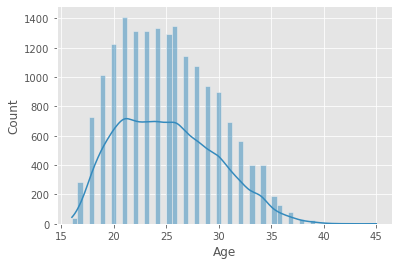

In [29]:
print(df1["Age"].median())
sns.histplot(df1.Age,kde='True')

 Here, we can see our age median is 25 and we can also notice that majority of players are closer to age 25.

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

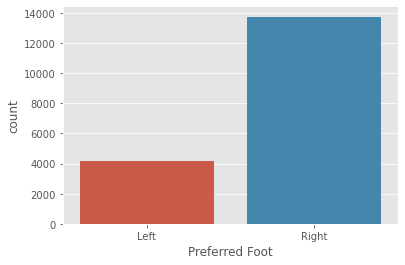

In [30]:
sns.countplot(x='Preferred Foot',data=df1)

Here, we can see most players are Right footed.We can also check what is the percentages of the same plot.

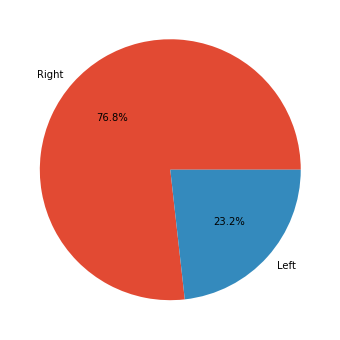

In [24]:
plt.subplots(figsize=(7,6))
plt.pie(df1["Preferred Foot"].value_counts(),labels=["Right","Left"],autopct='%1.1f%%')
plt.show()

#### Lets see, Top 10 nationality from which most of the players belong.

In [25]:
df1['Nationality'].value_counts()

England                 1655
Germany                 1195
Spain                   1071
Argentina                935
France                   910
                        ... 
Andorra                    1
Oman                       1
Nicaragua                  1
United Arab Emirates       1
Kuwait                     1
Name: Nationality, Length: 163, dtype: int64

Text(0, 0.5, 'Count')

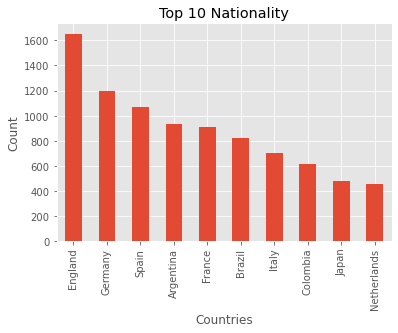

In [26]:
ax = df1['Nationality'].value_counts() \
.head(10) \
.plot(kind='bar',title='Top 10 Nationality')
ax.set_xlabel("Countries")
ax.set_ylabel("Count")

#### Now, lets draw heatmap to check how closely related our categorical values are to each other

In [32]:
df_corr = df1[['Overall','Value','Wage']].corr()
df_corr

,Overall,Value,Wage
Overall,1.000000,0.631673,0.576098
Value,0.631673,1.000000,0.858037
Wage,0.576098,0.858037,1.000000


<AxesSubplot:>

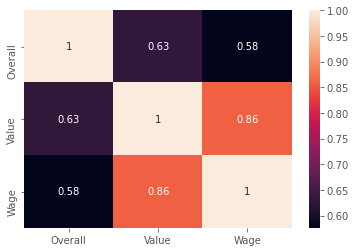

In [33]:
sns.heatmap(df_corr,annot=True)

Here, we can clearly see on our heatmap that "Value" is pretty closely related to "Wage", so lets visualize this using scatterplot.

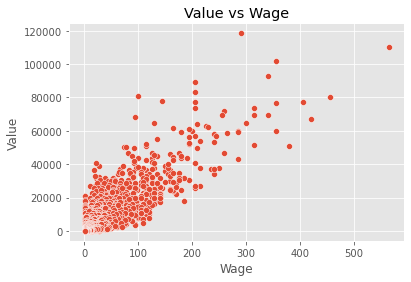

In [42]:
ax = sns.scatterplot(x='Wage',
               y="Value",
              data=df1)
ax.set_title("Value vs Wage")
plt.show()

After plotting we are pretty confident that this plot has indeed a positive correlationship. In other word we can clearly see as players wage is increasing the value on the other hand is also increasing. 

Thank you for having a look on my EDA as this is my very first EDA and I am new to data science, any further improvement or comments are appreciated.